## Explore the Data and Clean it

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.txt', sep=';', names=["Sentence","Emotion"])
df

,Sentence,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [3]:
df.shape

(20000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  20000 non-null  object
 1   Emotion   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [5]:
df.Emotion.unique()

array(['sadness', 'love', 'anger', 'joy', 'fear', 'surprise'],
      dtype=object)

## Building the Model

### Split data into train and test

In [6]:
x = df.Sentence
y = df.Emotion

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [9]:
x_train.shape, y_train.shape

((14000,), (14000,))

In [10]:
x_test.shape, y_test.shape

((6000,), (6000,))

## Make the Model

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [12]:
vectorizer = TfidfVectorizer()
xx = vectorizer.fit_transform(x_train) 
vectorizer.get_feature_names_out()

array(['aa', 'aaaaaaand', 'aaaah', ..., 'zum', 'zumba', 'zz'],
      dtype=object)

In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
svm_model = LinearSVC()
svm_model.fit(xx, y_train)

C:\Users\Cihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [15]:
xx_test = vectorizer.transform(x_test)
svm_predictions = svm_model.predict(xx_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.8935
SVM Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.86      0.88       785
        fear       0.85      0.82      0.84       689
         joy       0.90      0.94      0.92      2054
        love       0.85      0.78      0.81       506
     sadness       0.92      0.94      0.93      1757
    surprise       0.79      0.66      0.72       209

    accuracy                           0.89      6000
   macro avg       0.87      0.83      0.85      6000
weighted avg       0.89      0.89      0.89      6000



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

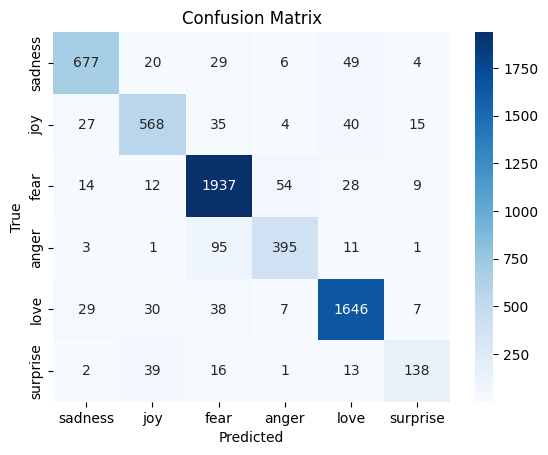

In [17]:
conf_matrix = confusion_matrix(y_test, svm_predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
           yticklabels=['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

It dont understand fear and anger, I will add more data for anger

### Make it Better 

C:\Users\Cihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.9410454985479186
SVM Classification Report:
               precision    recall  f1-score   support

     Emotion       0.00      0.00      0.00         1
       anger       0.95      0.95      0.95      1752
        fear       0.94      0.93      0.93      1529
         joy       0.96      0.90      0.93      1984
        love       0.88      0.95      0.91       944
     sadness       0.95      0.97      0.96      3657
    surprise       0.91      0.86      0.88       463

    accuracy                           0.94     10330
   macro avg       0.80      0.79      0.80     10330
weighted avg       0.94      0.94      0.94     10330



C:\Users\Cihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

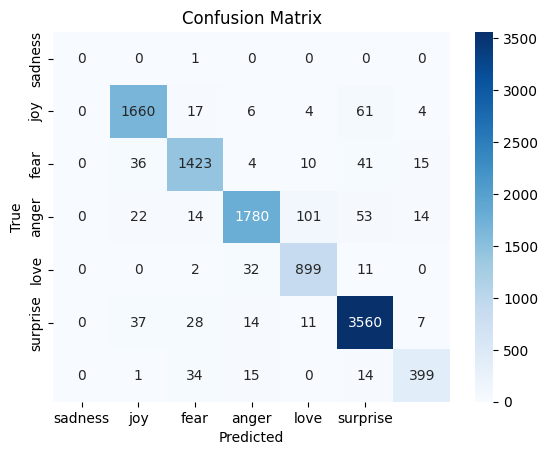

In [23]:
df = pd.read_csv('data2.txt', sep=';', names=["Sentence", "Emotion"])
df = df[df["Emotion"] != "happy"]
x = df.Sentence
y = df.Emotion

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

vectorizer = TfidfVectorizer()
xx = vectorizer.fit_transform(x_train) 
vectorizer.get_feature_names_out()

svm_model = LinearSVC()
svm_model.fit(xx, y_train)

xx_test = vectorizer.transform(x_test)
svm_predictions = svm_model.predict(xx_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

conf_matrix = confusion_matrix(y_test, svm_predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
           yticklabels=['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Try it on custom data

In [19]:
input_text = str(input("Write your sentence: "))

Write your sentence:  I am happy


In [20]:
def preprocess_text(text: str) -> str:
    text = text.lower()            
    return text.translate(str.maketrans('','',string.punctuation))

In [21]:
processed = preprocess_text(input_text)
    
vector = vectorizer.transform([processed])
    
predictions = svm_model.predict(vector)
    
print(f"Input Text: {input_text}")
print(f"Predicted Sentiment: {predictions}")

Input Text: I am happy
Predicted Sentiment: ['joy']


## Save the Model

In [22]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)